
# NASA SARP Coding Lecture: Working with Tabular and Multi-Dimensional Data

We will explore two powerful Python libraries:
- **Pandas**: used for working with **tabular data** such as spreadsheets and CSV files.
- **Xarray**: designed for handling **multi-dimensional scientific datasets** like NetCDF and HDF, often used in climate science and Earth observations.

---

##  What's the Difference Between Tabular and Multi-Dimensional Data?

### Tabular Data (Pandas)
Tabular data resembles an Excel sheet or a database table. It consists of **rows and columns**, where each row is an observation, and each column is a variable. This is ideal for:
- CSV files
- Excel spreadsheets
- Relational databases

**Use Pandas when:**
- Your data is flat and well-structured
- You need to perform group-by operations, filtering, reshaping, or plotting

### Multi-Dimensional Data (Xarray)
Multi-dimensional datasets can have multiple labeled dimensions, such as **time, latitude, longitude, depth, pressure**, etc. Commonly used in:
- Climate data
- Satellite data
- Model output data

**Use Xarray when:**
- Your data comes from NetCDF, HDF5, GRIB, or other scientific formats
- You need to analyze or visualize data with more than two dimensions

---

Now let’s dive into real-world examples and understand how to work with each type effectively.


## Part 1: Tabular Data with Pandas (Titanic Dataset)
We'll analyze passenger data from the Titanic to understand survival rates, demographics, and trends.

**We start by importing the required libraries: pandas for data handling, matplotlib and seaborn for plotting.**

What This Does:
**pandas as pd**: Imports the Pandas library and gives it a nickname (pd). Pandas is used to load, explore, clean, and manipulate tabular data (like spreadsheets).

**matplotlib.pyplot as plt**: Imports Matplotlib, the core plotting library in Python, for drawing charts and figures.

**seaborn as sns**: Imports Seaborn, a higher-level plotting library built on top of Matplotlib. It makes charts prettier and easier to create.

**sns.set(style='whitegrid')**: Sets a visual theme for all plots—here we use 'whitegrid', which adds subtle grid lines to make charts easier to read.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

We’ll load the Titanic dataset directly from an online repository (Seaborn's GitHub).

**NEXT: We load the Titanic dataset from Seaborn’s GitHub as a CSV file using pandas.**

The first line stores a link (URL) to a CSV file in a variable called url. That CSV file contains the Titanic dataset, hosted on GitHub.

The second line uses **pd.read_csv(url)** to download and read the CSV file into a DataFrame named df.

A DataFrame is like a table with rows and columns—it’s the main data structure used in Pandas.

The third line **df.head()** shows the first five rows of the data so we can preview it.

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)
df.head()

This dataset includes information such as:
- `survived`: 0 = No, 1 = Yes
- `pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
- `sex`, `age`, `fare`, `embarked`, and more

**NEXT: We inspect the data types, number of non-null values, and memory usage of each column.**

In [ ]:
df.info()

**NEXT: We generate summary statistics like mean, standard deviation, and quartiles for all columns.**

In [ ]:
df.describe(include='all')

**NEXT: We count how many missing (null) values there are in each column.**

In [ ]:
df.isnull().sum()

**NEXT: We replace missing values in the 'age' column with the median age to clean the data.**

What This Does:
This line fills in missing values (nulls) in the age column.

**df['age'].median()** calculates the median age from the column (i.e., the middle value).

**.fillna(...)** fills any missing values with that median.

We then assign the result back to **df['age']**, so our dataset is now updated.

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

**NEXT: We remove any rows that are missing values in the 'embarked' column.**

What This Does:
This line removes rows from the dataset where the value in the 'embarked' column is missing (NaN).

**subset=['embarked']** means we’re only checking the 'embarked' column for nulls.

**inplace=True** tells Pandas to apply the change directly to the original DataFrame.

In [ ]:
df.dropna(subset=['embarked'], inplace=True)

**NEXT: We calculate the survival rate by grouping the data by gender and passenger class.**

What This Does:
**df.groupby(['sex', 'pclass'])** groups the data by gender and passenger class.

**['survived']** isolates just the 'survived' column.

**.mean()** calculates the average survival rate (i.e., percentage of survivors) for each group.

**.unstack()** rearranges the results into a more readable table format, where:

Rows are genders (male, female)

Columns are classes (1, 2, 3)

Values are survival rates (between 0 and 1)

In [ ]:
df.groupby(['sex', 'pclass'])['survived'].mean().unstack()

**NEXT: We visualize survival rates by class and gender using a bar chart.**

What This Does:
**sns.barplot(...)**
This draws a bar chart that shows the average survival rate (i.e., the percentage of people who survived) for each passenger class.

**x='pclass'**: puts passenger class (1st, 2nd, 3rd) on the x-axis.

**y='survived'**: calculates the mean survival rate (since survived is 0 or 1, the average = % survived).

**hue='sex'**: splits each bar by gender, so you’ll see separate bars for male and female in each class.

This lets us compare survival rates visually:

Did more women survive than men?

Did first-class passengers survive more than third-class?

**plt.title(...)**
Adds a clear title to the chart so we know what it’s showing.

**plt.ylabel(...)**
Labels the y-axis to show we’re measuring survival rate (a value between 0 and 1).

**plt.show()**
Displays the finished plot in the notebook.

In [ ]:
sns.barplot(data=df, x='pclass', y='survived', hue='sex')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()

**NEXT: We plot a histogram to understand the age distribution of passengers.**

What Each Line Does:
**plt.hist(df['age'], bins=20, edgecolor='black')**
This draws a histogram of the age column.

A histogram groups ages into ranges (called bins) and counts how many people fall into each range.

**bins=20** divides the age range (e.g. 0–80) into 20 smaller age groups (like 0–4, 5–9, 10–14, etc.).

**edgecolor='black'** adds a black border around each bar to make it easier to see the bins clearly.

This helps you see the shape of the age distribution—Are there more young people? Are most passengers adults?

**plt.title('Age Distribution')**
Adds a title to the plot.

**plt.xlabel('Age')**
Labels the x-axis so we know it shows passenger ages.

**plt.ylabel('Count')**
Labels the y-axis to show the number of passengers in each age range.

**plt.show()**
Displays the plot in the notebook.

In [ ]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Practice Task (Pandas)
- Find average age of survivors vs non-survivors
- Visualize number of passengers per embarkation port
- Investigate survival rate by family size (`sibsp + parch`)

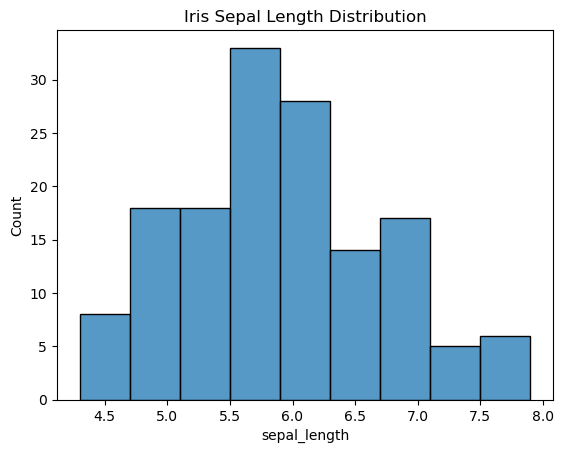

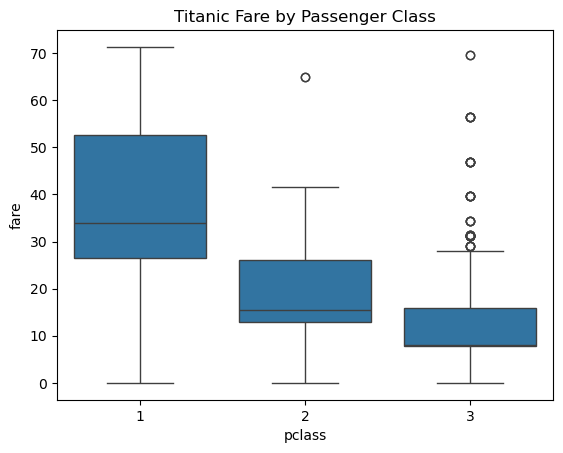

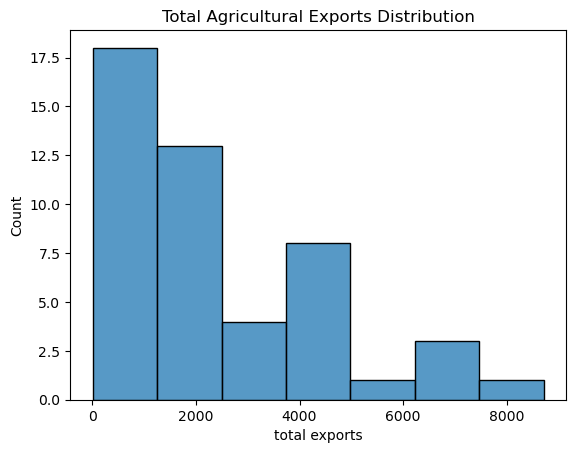

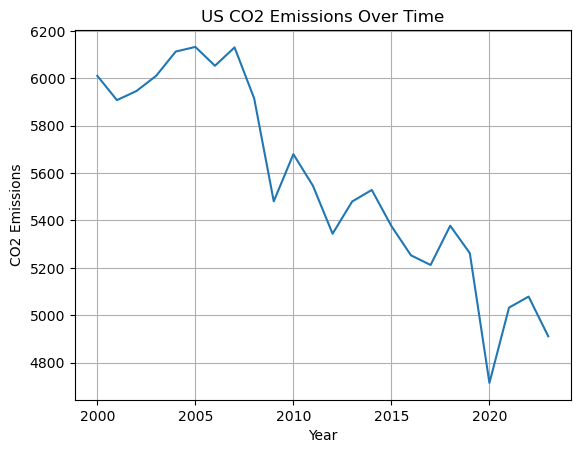

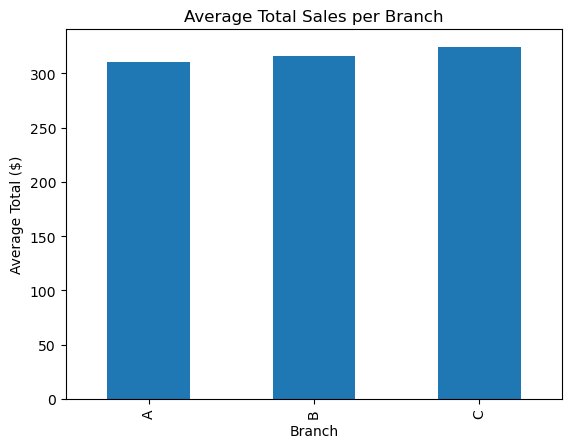

In [1]:
##NEW EXAMPLES:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. IRIS DATASET
# -----------------------------
# Load the Iris flower dataset (classification classic)
iris_url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris = pd.read_csv(iris_url)

# Cleaning steps:
# Introduce missing values and handle them
iris.loc[0:5, 'sepal_length'] = np.nan
iris['sepal_length'] = iris['sepal_length'].fillna(iris['sepal_length'].mean())

# Remove duplicate rows
iris = iris.drop_duplicates()

# Convert species column to a categorical data type
iris['species'] = iris['species'].astype('category')

# Remove outliers from petal_length using IQR
Q1 = iris['petal_length'].quantile(0.25)
Q3 = iris['petal_length'].quantile(0.75)
IQR = Q3 - Q1
iris = iris[(iris['petal_length'] >= Q1 - 1.5 * IQR) & (iris['petal_length'] <= Q3 + 1.5 * IQR)]

# Normalize sepal_width column
iris['sepal_width_norm'] = (iris['sepal_width'] - iris['sepal_width'].min()) / (iris['sepal_width'].max() - iris['sepal_width'].min())

# Plot histogram to show distribution of sepal length
sns.histplot(iris['sepal_length'])
plt.title("Iris Sepal Length Distribution")
plt.show()

# -----------------------------
# 2. TITANIC DATASET
# -----------------------------
# Load Titanic survival dataset (binary classification)
titanic = sns.load_dataset('titanic')  # This works locally or in Colab

# Fill missing age values with the column mean
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

# Remove duplicates
titanic = titanic.drop_duplicates()

# Convert embarked to categorical
titanic['embarked'] = titanic['embarked'].astype('category')

# Remove outliers from fare using IQR
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
titanic = titanic[(titanic['fare'] >= Q1 - 1.5 * IQR) & (titanic['fare'] <= Q3 + 1.5 * IQR)]

# Normalize fare
titanic['fare_norm'] = (titanic['fare'] - titanic['fare'].min()) / (titanic['fare'].max() - titanic['fare'].min())

# Box plot showing fare distribution by class
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title("Titanic Fare by Passenger Class")
plt.show()

# -----------------------------
# 3. AIR QUALITY (PROXY: US EXPORTS)
# -----------------------------
# Using US export data as a proxy for air quality-related tabular data
aq_url = "https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv"
aq = pd.read_csv(aq_url)

# Drop missing values and duplicates
aq = aq.dropna()
aq = aq.drop_duplicates()

# Add a dummy categorical column
aq['category'] = 'Agriculture'

# Remove outliers from total exports
Q1 = aq['total exports'].quantile(0.25)
Q3 = aq['total exports'].quantile(0.75)
IQR = Q3 - Q1
aq = aq[(aq['total exports'] >= Q1 - 1.5 * IQR) & (aq['total exports'] <= Q3 + 1.5 * IQR)]

# Normalize total exports
aq['normalized_exports'] = (aq['total exports'] - aq['total exports'].min()) / (aq['total exports'].max() - aq['total exports'].min())

# Histogram of total exports
sns.histplot(aq['total exports'])
plt.title("Total Agricultural Exports Distribution")
plt.show()

# -----------------------------
# 4. CO2 EMISSIONS (OWID DATA)
# -----------------------------
# Load country-level CO2 emissions data
co2_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
co2 = pd.read_csv(co2_url)

# Filter to only US data after year 2000
co2 = co2[co2['year'] >= 2000]
co2 = co2[co2['country'] == 'United States']

# Keep relevant columns and clean
co2 = co2[['year', 'co2', 'population']].dropna().drop_duplicates()

# Calculate per capita emissions
co2['co2_per_capita'] = co2['co2'] / co2['population']

# Normalize total CO2
co2['co2_norm'] = (co2['co2'] - co2['co2'].min()) / (co2['co2'].max() - co2['co2'].min())

# Line plot of CO2 emissions over time
plt.plot(co2['year'], co2['co2'])
plt.title("US CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.grid(True)
plt.show()

# -----------------------------
# 5. RETAIL SALES DATA
# -----------------------------
# Load supermarket sales dataset
retail_url = "https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/supermarket_Sales.csv"
retail = pd.read_csv(retail_url)

# Clean the data
retail = retail.dropna()
retail = retail.drop_duplicates()

# Convert date column and normalize total
retail['Date'] = pd.to_datetime(retail['Date'])
retail['Total_norm'] = (retail['Total'] - retail['Total'].min()) / (retail['Total'].max() - retail['Total'].min())

# Remove outliers from Total using IQR
Q1 = retail['Total'].quantile(0.25)
Q3 = retail['Total'].quantile(0.75)
IQR = Q3 - Q1
retail = retail[(retail['Total'] >= Q1 - 1.5 * IQR) & (retail['Total'] <= Q3 + 1.5 * IQR)]

# Bar plot of average sales per branch
retail.groupby('Branch')['Total'].mean().plot(kind='bar')
plt.title("Average Total Sales per Branch")
plt.ylabel("Average Total ($)")
plt.xlabel("Branch")
plt.show()


## Part 2: Multi-Dimensional Data with Xarray (NOAA Sea Surface Temperature)
We’ll now explore global sea surface temperature (SST) data using the `xarray` library. This data comes from NOAA and is stored in NetCDF format.


We are importing the `xarray` library, which is specially designed to handle labeled multi-dimensional arrays—ideal for scientific data like climate and ocean measurements. We also import `numpy` for numerical operations.


In [ ]:
import xarray as xr
import numpy as np

**NEXT: We’ll load the data directly from NOAA’s public THREDDS data server using OPeNDAP.**


This line opens a **remote NetCDF dataset** using OPeNDAP (a protocol for accessing scientific data over the web). The dataset we’re accessing is the NOAA Extended Reconstructed Sea Surface Temperature (ERSST v5), which contains global monthly sea surface temperatures (SST) from 1854 to the present.

What Each Line Does:
**url = 'https://psl.noaa.gov/.../sst.mnmean.nc'**
This stores the web address of a NetCDF file hosted by NOAA.

The file contains global monthly sea surface temperature (SST) data from the ERSST v5 dataset.

The **.nc extension** stands for NetCDF, a format used for scientific data that spans multiple dimensions like time, latitude, and longitude.

**ds = xr.open_dataset(url)**
This line uses xarray to open the dataset directly from the internet using a protocol called OPeNDAP.

**xr.open_dataset(...)** returns a special data structure called a Dataset, which behaves like a labeled data cube.

At this point, ds contains all of the SST data—over 150 years of monthly ocean temperatures, organized by time, latitude, and longitude.

**ds**
Simply typing ds shows a summary of the dataset.

You’ll see:

All the dimensions (e.g., time, lat, lon)

All the variables (like sst)

Coordinate ranges and units

Metadata about where the data came from


In [ ]:
url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)
ds


This shows the **dimensions** of the dataset, such as `time`, `lat`, and `lon`. Each variable in the dataset is defined across these dimensions.


In [ ]:
ds.dims


This prints the **coordinate variables** like `time`, `lat`, and `lon`, which are used to label the axes of the data arrays. They help us slice and index the dataset meaningfully.


In [ ]:
ds.coords


Here we inspect the **data variables** contained in the dataset. In this case, the key variable is `sst` (sea surface temperature), measured in °C.


In [ ]:
ds.data_vars


We’re accessing the main SST variable, which is a 3D array indexed by `time`, `lat`, and `lon`. This array holds temperature values across the globe for each month.


In [ ]:
sst = ds['sst']
sst


We’re selecting the temperature values for **January 2000** using `sel()`, which allows selecting data by label (not by index). This returns a 2D slice (lat × lon) of sea surface temperatures for that month.


In [ ]:
sst_2000 = sst.sel(time='2000-01')
sst_2000


This plots the 2D SST data for January 2000 using a **color map**. Each color represents a temperature in degrees Celsius. We use `coolwarm` to highlight differences across ocean regions.


In [ ]:
sst_2000.plot(cmap='coolwarm')
plt.title('Global SST - January 2000')
plt.show()


**NEXT: We’re zooming into the **tropical Pacific region** by selecting latitudes between 10°N and 10°S and longitudes from 120° to 280°. This region includes key climate zones like El Niño/La Niña.**


Code:
**subset = sst.sel(lat=slice(10, -10), lon=slice(120, 280))**

What it does:
We extract a smaller region from the global SST dataset:

**lat=slice(10, -10)** selects latitudes from 10°N to 10°S — this is the tropics, near the equator.

**lon=slice(120, 280)** selects longitudes from 120°E to 280°E — covering the central and eastern Pacific Ocean.

 **The result:** subset is a smaller 3D block of data (time × lat × lon) focused on the tropical Pacific, a region where major climate events like El Niño and La Niña happen.


Code:

**subset_2000 = subset.sel(time='2000-01)**
 What it does:
We select one specific month: January 2000 from the subset.
This gives us a 2D temperature map (latitude × longitude) for that month and region.

Code:
**subset_2000.plot(cmap='viridis')**
 What it does:
We create a colorful heatmap of sea surface temperatures in the tropical Pacific.

**cmap='viridis'** uses a colormap that moves from dark purple (cold) to yellow-green (warm).

 You can now visually detect warm and cool areas in the ocean.

Code:
**plt.title('Tropical Pacific SST - January 2000')**
What it does:
Adds a title to the chart.

**plt.show()** displays the plot in the notebook.

In [ ]:
subset = sst.sel(lat=slice(10, -10), lon=slice(120, 280))
subset_2000 = subset.sel(time='2000-01')
subset_2000.plot(cmap='viridis')
plt.title('Tropical Pacific SST - January 2000')
plt.show()


**NEXT: We’re calculating the **climatological mean**—the average temperature for each point on Earth over all available time steps. This provides a baseline view of ocean temperatures.**

Code:
**sst_mean = sst.mean(dim='time')**
 What it does:
This line calculates the average temperature at each point on Earth across all months in the dataset.

The original sst variable contains SST data across 3 dimensions: time × latitude × longitude.

**.mean(dim='time')** compresses the time dimension, resulting in a 2D array of mean SST values at each (lat, lon) location.

The result: **sst_mean** is a map of what the typical ocean temperature looks like around the globe — the climatology.

Code:
**sst_mean.plot(cmap='plasma')**
 What it does:
This line creates a colorful map showing the long-term average SST around the world.

**cmap='plasma'** is a vivid colormap that moves from dark purple (cool) to bright yellow (warm).

This color range makes it easier to spot warm equatorial waters vs cold polar waters.

Code:

**plt.title('Mean SST (Climatology)')**
What it does:
Adds a title to the plot to describe what’s being visualized.

**plt.show()** renders the final image.


In [ ]:
sst_mean = sst.mean(dim='time')
sst_mean.plot(cmap='plasma')
plt.title('Mean SST (Climatology)')
plt.show()

### Practice Task (Xarray)
- Select SST for July 2010
- Subtract one time slice from another to detect anomalies
- Average SST over region across time and plot the trend

## Summary
- Use **pandas** for tabular, row-column datasets (CSV, Excel)
- Use **xarray** for multi-dimensional datasets with labeled axes (e.g., time, lat, lon)
- Both support rich analysis and plotting workflows

_Prepared for NASA SARP by Sufian Aldogom_

<xarray.Dataset> Size: 3MB
Dimensions:  (COADSX: 180, COADSY: 90, TIME: 12)
Coordinates:
  * COADSX   (COADSX) float64 1kB 21.0 23.0 25.0 27.0 ... 375.0 377.0 379.0
  * COADSY   (COADSY) float64 720B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * TIME     (TIME) float64 96B 366.0 1.096e+03 ... 7.671e+03 8.401e+03
Data variables:
    SST      (TIME, COADSY, COADSX) float32 778kB ...
    AIRT     (TIME, COADSY, COADSX) float32 778kB ...
    UWND     (TIME, COADSY, COADSX) float32 778kB ...
    VWND     (TIME, COADSY, COADSX) float32 778kB ...
Attributes:
    history:                         FERRET V4.30 (debug/no GUI) 15-Aug-96
    DODS_EXTRA.Unlimited_Dimension:  TIME


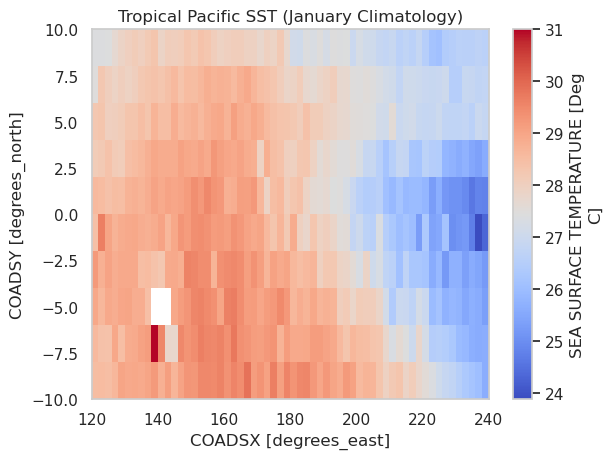

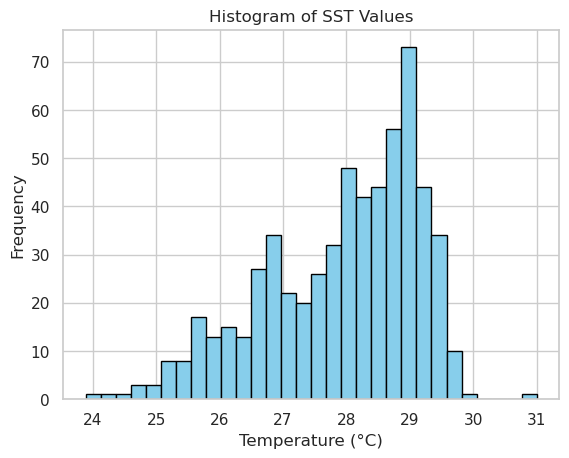

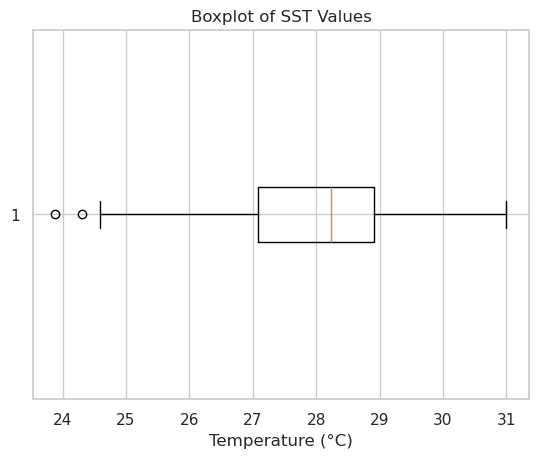

In [46]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# ===============================
#  Load NetCDF with decode_times=False to prevent datetime overflow
# ===============================
url = "http://test.opendap.org/opendap/data/nc/coads_climatology.nc"
ds = xr.open_dataset(url, decode_times=False)

# View dataset structure
print(ds)

# ===============================
#  Extract Sea Surface Temperature (SST)
# ===============================
sst = ds['SST']  # Units: °C

# ===============================
#  Clean data: Remove fill values
# ===============================
sst_clean = sst.where(sst > -1e30)

# Select one climatology month (e.g., January = index 0)
sst_jan = sst_clean.isel(TIME=0)

# Focus on tropical Pacific
sst_region = sst_jan.sel(COADSY=slice(-10, 10), COADSX=slice(120, 240))

# ===============================
#  Analysis: Flatten, clean, describe
# ===============================
values = sst_region.values.flatten()
values = values[~np.isnan(values)]

# ===============================
#  Plot 1: SST Map
# ===============================
sst_region.plot(cmap='coolwarm')
plt.title("Tropical Pacific SST (January Climatology)")
plt.show()

# ===============================
#  Plot 2: Histogram of Values
# ===============================
plt.hist(values, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of SST Values")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# ===============================
#  Plot 3: Boxplot of SST
# ===============================
plt.boxplot(values, vert=False)
plt.title("Boxplot of SST Values")
plt.xlabel("Temperature (°C)")
plt.show()
